# Used Car Price Prediction🏎️
### By Dishan Purkayastha

Importing Required Packages

In [2]:
import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

Importing dataset

In [3]:
data=pd.read_csv('cars.csv')

Basic Analysis Of Dataset:

In [4]:
data.head(3)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50


In [5]:
data.shape

(6019, 14)

In [6]:
data.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [7]:
data.info

<bound method DataFrame.info of       Unnamed: 0                              Name    Location  Year  \
0              0            Maruti Wagon R LXI CNG      Mumbai  2010   
1              1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2              2                      Honda Jazz V     Chennai  2011   
3              3                 Maruti Ertiga VDI     Chennai  2012   
4              4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
...          ...                               ...         ...   ...   
6014        6014                  Maruti Swift VDI       Delhi  2014   
6015        6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015   
6016        6016             Mahindra Xylo D4 BSIV      Jaipur  2012   
6017        6017                Maruti Wagon R VXI     Kolkata  2013   
6018        6018             Chevrolet Beat Diesel   Hyderabad  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
0                 72000       

##### Dataset Analysis On Various Parameters:

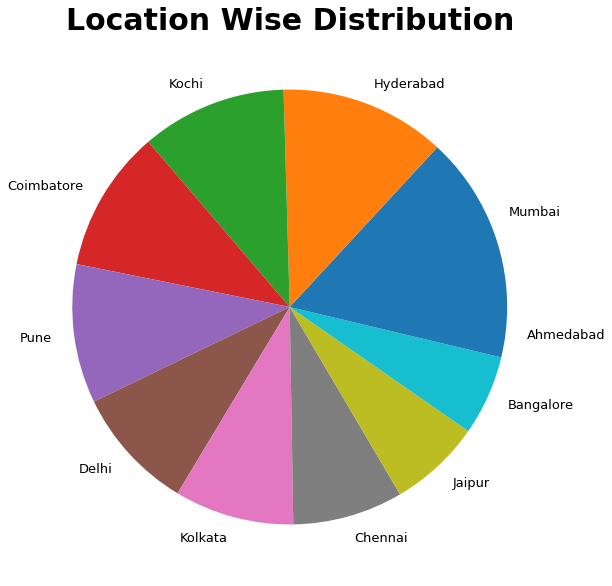

In [8]:
loc = data.groupby('Location')[['Unnamed: 0']].count()
loc =loc.sort_values('Unnamed: 0', ascending=False).reset_index()
loc.rename(columns = {'Unnamed: 0':'Cars'},inplace=True)
loc

labels = list(loc.Location)
plt.figure(figsize=(10,10))
plt.title("Location Wise Distribution",fontweight='bold',fontsize=30)
plt.tick_params(labelsize=40)
plt.pie(loc.Cars,labels=labels,textprops={'fontsize': 13});
plt.savefig('loaction.png', dpi=300)

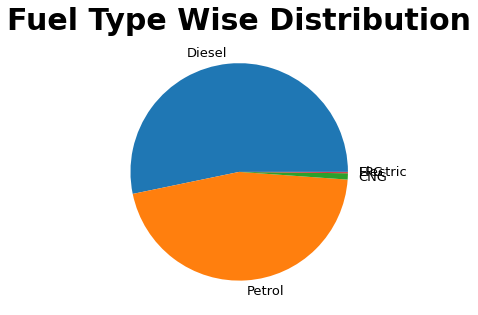

In [9]:
loc = data.groupby('Fuel_Type')[['Unnamed: 0']].count()
loc =loc.sort_values('Unnamed: 0', ascending=False).reset_index()
loc.rename(columns = {'Unnamed: 0':'Cars'},inplace=True)
loc

labels = list(loc.Fuel_Type)
plt.figure(figsize=(5,5))
plt.title("Fuel Type Wise Distribution",fontweight='bold',fontsize=30)
plt.tick_params(labelsize=40)
plt.pie(loc.Cars,labels=labels,textprops={'fontsize': 13});
plt.savefig('fueltype.png', dpi=300)

In [10]:
loc = data.groupby('Year')[['Unnamed: 0']].count()
loc =loc.sort_values('Unnamed: 0', ascending=False).reset_index()
loc.rename(columns = {'Unnamed: 0':'Cars'},inplace=True)
loc

,Year,Cars
0,2014,797
1,2015,744
2,2016,741
3,2013,649
4,2017,587
5,2012,580
6,2011,466
7,2010,342
8,2018,298
9,2009,198


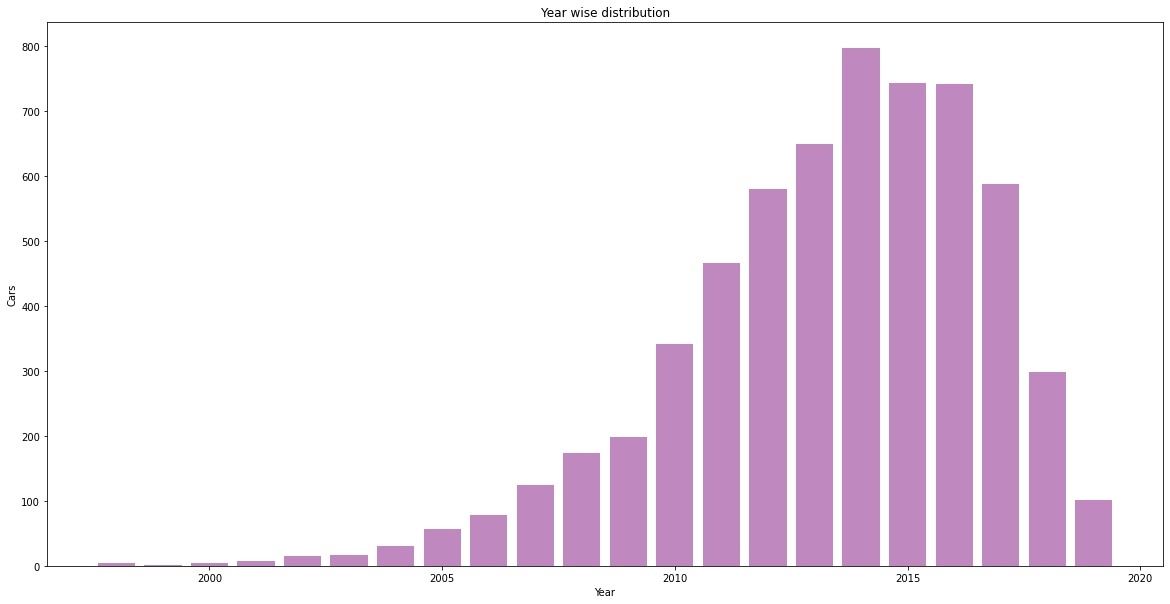

In [11]:
plt.figure(figsize=(20,10))
plt.xlabel('Year')
plt.ylabel('Cars')
plt.title('Year wise distribution');
plt.bar(loc.Year,loc.Cars, color='#bf88be');
plt.savefig('yearwise.png', dpi=300)

In [12]:
data.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [13]:
data.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

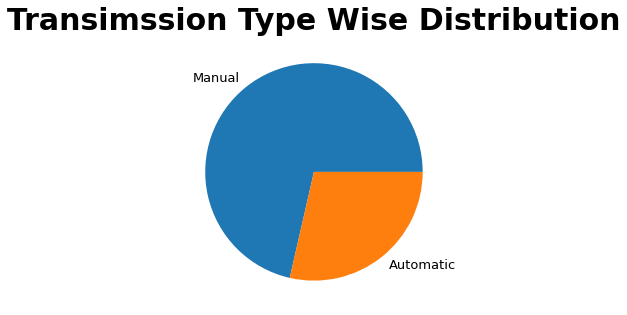

In [44]:
loc = data.groupby('Transmission')[['Unnamed: 0']].count()
loc =loc.sort_values('Unnamed: 0', ascending=False).reset_index()
loc.rename(columns = {'Unnamed: 0':'Cars'},inplace=True)
loc

labels = list(loc.Transmission)
plt.figure(figsize=(5,5))
plt.title("Transimssion Type Wise Distribution",fontweight='bold',fontsize=30)
plt.tick_params(labelsize=40)
plt.pie(loc.Cars,labels=labels,textprops={'fontsize': 13});
plt.savefig('manual.png', dpi=300)

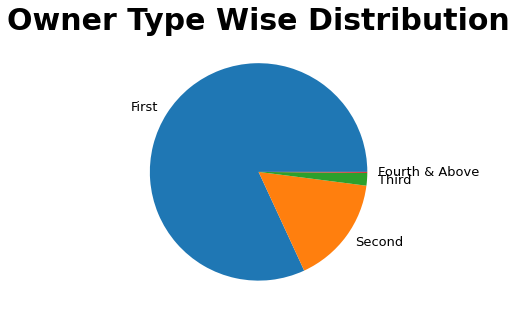

In [43]:
loc = data.groupby('Owner_Type')[['Unnamed: 0']].count()
loc =loc.sort_values('Unnamed: 0', ascending=False).reset_index()
loc.rename(columns = {'Unnamed: 0':'Cars'},inplace=True)
loc

labels = list(loc.Owner_Type)
plt.figure(figsize=(5,5))
plt.title("Owner Type Wise Distribution",fontweight='bold',fontsize=30)
plt.tick_params(labelsize=40)
plt.pie(loc.Cars,labels=labels,textprops={'fontsize': 13});
plt.savefig('trans.png', dpi=300)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], 
                                                    data.iloc[:, -1], 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [18]:
X_train.shape

(4213, 13)

### Refining Dataset

In [19]:
#Removing the first colum,as it is not of any use
X_train = X_train.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]

In [20]:
X_train['Name'].value_counts()

Mahindra XUV500 W8 2WD           35
Maruti Swift VDI                 31
Maruti Ritz VDi                  26
Hyundai i10 Sportz               25
Maruti Swift Dzire VDI           24
                                 ..
Toyota Corolla Executive (HE)     1
Tata Manza Aura Safire            1
Maruti Ciaz Alpha                 1
Force One LX 4x4                  1
Fiat Grande Punto 1.2 Dynamic     1
Name: Name, Length: 1592, dtype: int64

#### Deriving Manufacturer name from each car name,since it is an important paramter to determine re-sale value


In [21]:
make_train = X_train["Name"].str.split(" ", expand = True)
make_test = X_test["Name"].str.split(" ", expand = True)
X_train["Manufacturer"] = make_train[0]
X_test["Manufacturer"] = make_test[0]

In [54]:
X_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Manufacturer
4201,Volkswagen Polo Diesel Trendline 1.2L,Jaipur,2011,77000,Diesel,Manual,First,22.07 kmpl,1199 CC,73.9 bhp,5.0,NaN,Volkswagen
4383,Hyundai i10 Sportz,Hyderabad,2016,19947,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,NaN,Hyundai
1779,Mahindra XUV500 W8 2WD,Kochi,2014,70963,Diesel,Manual,First,15.1 kmpl,2179 CC,140 bhp,7.0,NaN,Mahindra
4020,Maruti Swift VDI BSIV,Kolkata,2013,115195,Diesel,Manual,First,25.2 kmpl,1248 CC,74 bhp,5.0,NaN,Maruti
3248,Volkswagen Polo Petrol Trendline 1.2L,Kochi,2011,58752,Petrol,Manual,First,16.47 kmpl,1198 CC,73.9 bhp,5.0,NaN,Volkswagen


Text(0, 0.5, 'Count of cars')

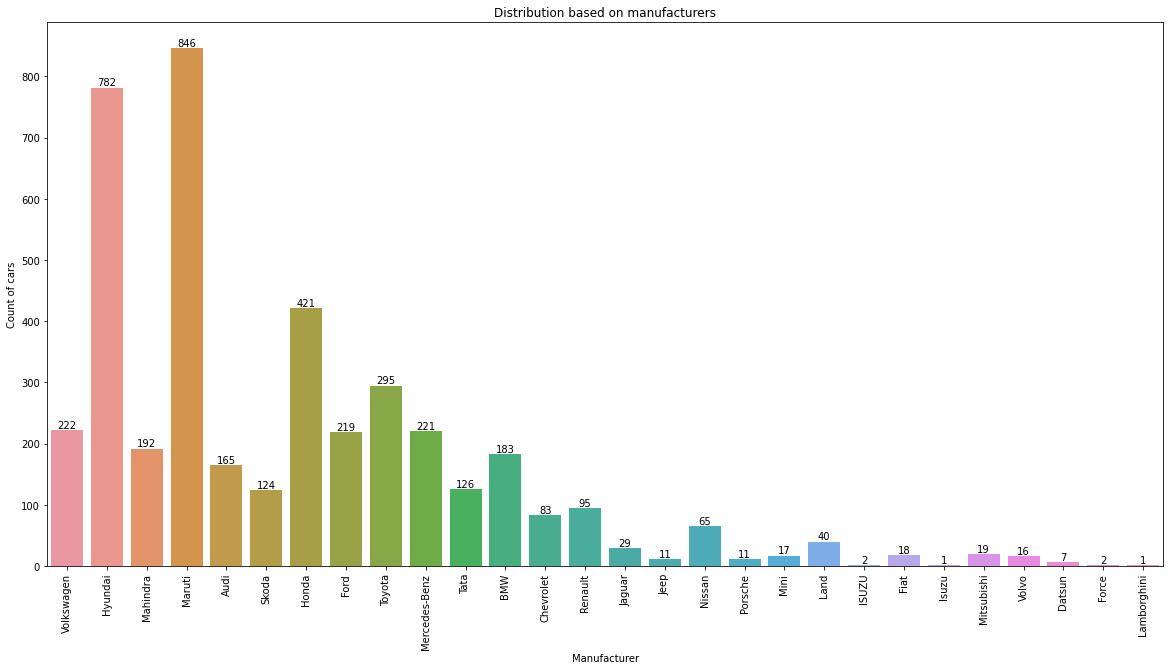

In [22]:
plt.figure(figsize = (20, 10))
plot = sns.countplot(x = 'Manufacturer', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Distribution based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

In [23]:
#Dropping Name & location as parameters as they are not determinants of price
X_train.drop("Name", axis = 1, inplace = True)
X_test.drop("Name", axis = 1, inplace = True)
X_train.drop("Location", axis = 1, inplace = True)
X_test.drop("Location", axis = 1, inplace = True)

In [24]:
#Deriving & Adding Car Age(In Years) To The Datasets
curr_time = datetime.datetime.now()
X_train['Year'] = X_train['Year'].apply(lambda x : curr_time.year - x)
X_test['Year'] = X_test['Year'].apply(lambda x : curr_time.year - x)

In [25]:
#Extracting numeric value of mileage
mileage_train = X_train["Mileage"].str.split(" ", expand = True)
mileage_test = X_test["Mileage"].str.split(" ", expand = True)

X_train["Mileage"] = pd.to_numeric(mileage_train[0], errors = 'coerce')
X_test["Mileage"] = pd.to_numeric(mileage_test[0], errors = 'coerce')

In [26]:
#Let's check for missing values.

print(sum(X_train["Mileage"].isnull()))
print(sum(X_test["Mileage"].isnull()))

1
1


In [27]:
#Replacing Missing Values With Mean Value
X_train["Mileage"].fillna(X_train["Mileage"].astype("float64").mean(), inplace = True)
X_test["Mileage"].fillna(X_train["Mileage"].astype("float64").mean(), inplace = True)

In [28]:
#Extracting numeric value of engine capacity & power
cc_train = X_train["Engine"].str.split(" ", expand = True)
cc_test = X_test["Engine"].str.split(" ", expand = True)

bhp_train = X_train["Power"].str.split(" ", expand = True)
bhp_test = X_test["Power"].str.split(" ", expand = True)

In [29]:
X_train["Engine"] = pd.to_numeric(cc_train[0], errors = 'coerce')
X_test["Engine"] = pd.to_numeric(cc_test[0], errors = 'coerce')

X_train["Power"] = pd.to_numeric(bhp_train[0], errors = 'coerce')
X_test["Power"] = pd.to_numeric(bhp_test[0], errors = 'coerce')

In [30]:
#Replacing All Missing Values With Mean Value

X_train["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)
X_test["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)

X_train["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)
X_test["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)

X_train["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)
X_test["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)

In [31]:
#Dropping New_price as a parameter since most values are missing from the dataset
X_train.drop(["New_Price"], axis = 1, inplace = True)
X_test.drop(["New_Price"], axis = 1, inplace = True)

Data Processing

In [32]:
#Creating Dummy Columns for categorical columns before training.
X_train = pd.get_dummies(X_train,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)

X_test = pd.get_dummies(X_test,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)

In [34]:
#Replacing Missing Columns With Zeroes
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

In [35]:
#Scaling The Values Before Training
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

### Training and Prediction:

Linear Regression Model:

In [36]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)
r2_score(y_test, y_pred)

0.7008908549416726

Random Forest Model

In [42]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.8863611922525705

##### Clearly,the Random Forest model performed better with an R2 score of 0.88